### Predicción de Supervivencia del Titanic

1. Importamos las librerías necesarias

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve)
from sklearn.preprocessing import LabelEncoder, StandardScaler

2. Cargamos el dataset y verificamos su información

In [77]:
ruta = "DataSet_Titanic.csv"
df = pd.read_csv(ruta)
print(df.head())
print(df.info())

   Sobreviviente  Clase  Genero  Edad  HermEsp  PadHij
0              0      3       0  22.0        1       0
1              1      1       1  38.0        1       0
2              1      3       1  26.0        0       0
3              1      1       1  35.0        1       0
4              0      3       0  35.0        0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sobreviviente  714 non-null    int64  
 1   Clase          714 non-null    int64  
 2   Genero         714 non-null    int64  
 3   Edad           714 non-null    float64
 4   HermEsp        714 non-null    int64  
 5   PadHij         714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 33.6 KB
None


3. Definimos las variables dependientes (y) e independientes (X)

In [78]:
X = df[["Clase", "Genero", "Edad", "HermEsp", "PadHij"]]
y = df["Sobreviviente"]

4. Separamos los registros entre entrenamiento y prueba

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Escalamos las variables numéricas

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

6. Creamos el modelo y lo entrenamos

In [81]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

7. Obtenemos las predicciones y las probabilidades de esas predicciones

In [82]:
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:,1]

8. Obtenemos las métricas del modelo

In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC: {roc_auc:.4f}")

Accuracy: 0.7413
Precisión: 0.6727
Recall: 0.6607
F1-Score: 0.6667
ROC: 0.7269


Text(50.722222222222214, 0.5, 'Real')

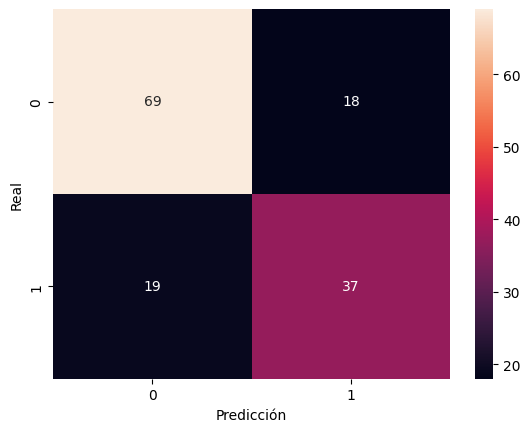

In [84]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')

C:\Users\carlo\AppData\Local\Temp\ipykernel_7736\3504099199.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


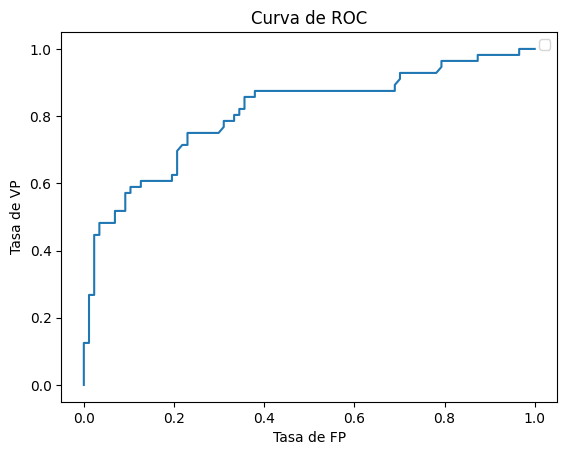

In [87]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('Tasa de FP')
plt.ylabel('Tasa de VP')
plt.title('Curva de ROC')
plt.legend()
plt.show()

In [88]:
# Importancia de cada parámetro
coeficientes = modelo.coef_[0]
nombres = ["Clase", "Genero", "Edad", "HermEsp", "PadHij"]
importancia = pd.DataFrame({
    "Atributo":nombres,
    "Coeficientes":coeficientes,
    "Abs":np.abs(coeficientes)
}).sort_values('Abs', ascending=False)

print(f"Importancia: {importancia}")

Importancia:   Atributo  Coeficientes       Abs
1   Genero      1.315215  1.315215
0    Clase     -1.089438  1.089438
2     Edad     -0.716113  0.716113
3  HermEsp     -0.306475  0.306475
4   PadHij     -0.038303  0.038303


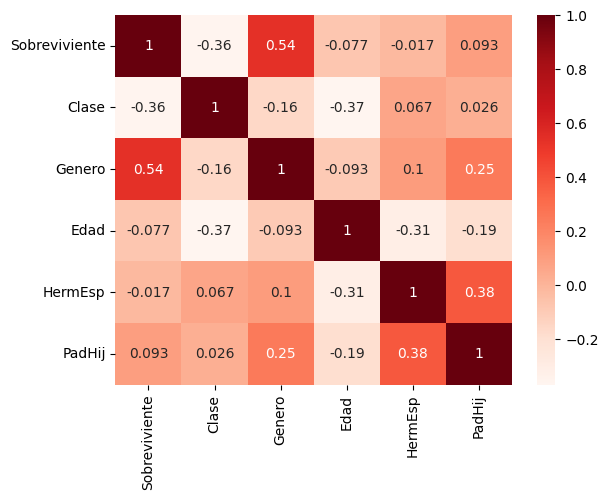

In [92]:
# Matriz de correlación
plt.figure()
correlacion = df[["Sobreviviente", "Clase", "Genero", "Edad", "HermEsp", "PadHij"]].corr()
sns.heatmap(correlacion, annot=True, cmap="Reds")
plt.show()

9. Probamos el modelo

In [ ]:
nueva_instancia = pd.DataFrame({
    'Clase':[1],
    'Genero':[0],
    'Edad':[32],
    'HermEsp':[1],
    'PadHij':[2]
})

nueva_instancia_escalada = scaler.transform(nueva_instancia)

prob_sobrevivir = modelo.predict_proba(nueva_instancia_escalada)[:,1][0]
sobrevive = modelo.predict(nueva_instancia_escalada)[0]

print(prob_sobrevivir)
print(sobrevive)